# TELEPORTATION

000 -> topmost qubit is the rightmost

In [20]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random

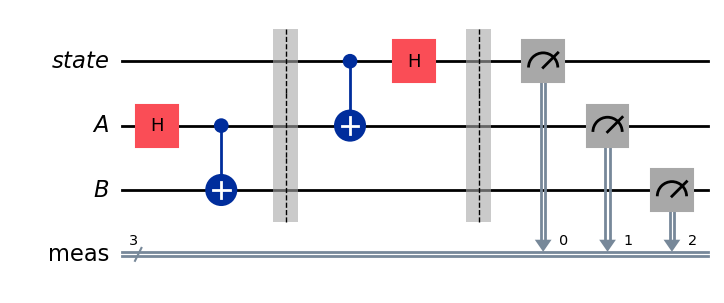

In [31]:
state = QuantumRegister(1, "state")
A = QuantumRegister(1, "A")
B = QuantumRegister(1, "B")
cr = ClassicalRegister(2, 'cr')
protocol = QuantumCircuit(state, A, B)

protocol.h(A)
protocol.cx(A, B)
protocol.barrier()

protocol.cx(state, A)
protocol.h(state)

protocol.measure_all()

protocol.draw("mpl")

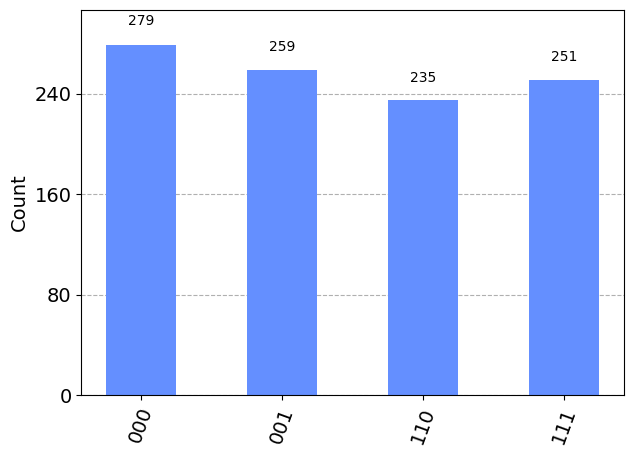

In [32]:

result = AerSimulator().run(protocol).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

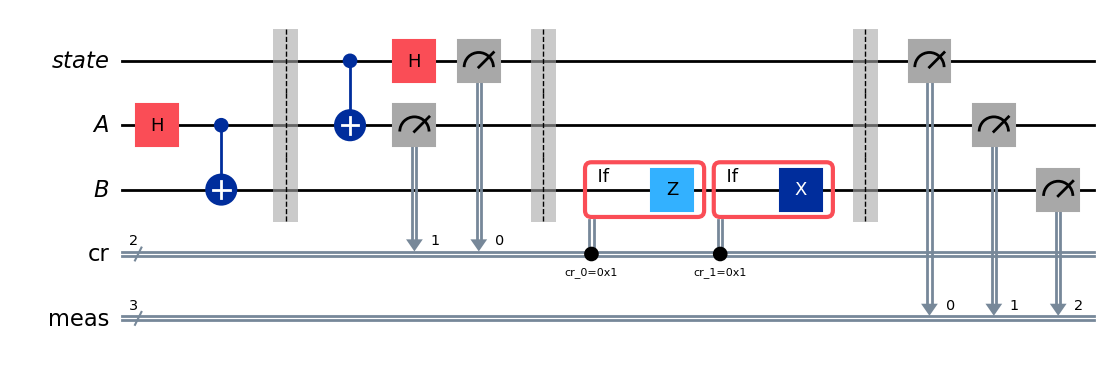

In [38]:
 
state = QuantumRegister(1, "state")
A = QuantumRegister(1, "A")
B = QuantumRegister(1, "B")
cr = ClassicalRegister(2, 'cr')
protocol = QuantumCircuit(state, A, B, cr)

protocol.h(A)
protocol.cx(A, B)
protocol.barrier()

protocol.cx(state, A)
protocol.h(state)
protocol.measure(state, cr[0])
protocol.measure(A, cr[1])
protocol.barrier()

with protocol.if_test((cr[0], 1)):
    protocol.z(B)
with protocol.if_test((cr[1], 1)):
    protocol.x(B)
 
protocol.measure_all()

protocol.draw("mpl")
 

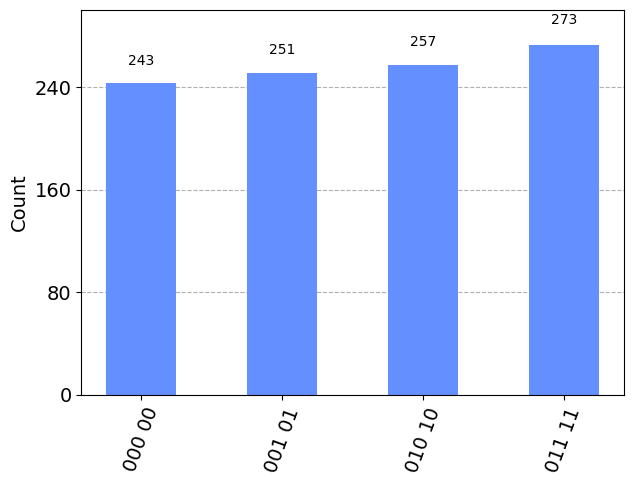

In [39]:
result = AerSimulator().run(protocol).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

In [ ]:
random_gate = UGate(
    theta=random.random() * 2 * pi,
    phi=random.random() * 2 * pi,
    lam=random.random() * 2 * pi,
)

display(random_gate.to_matrix())